In [164]:
# importing the libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
# Importing the clean dataset
df= pd.read_csv('../data/cleaned_df.csv')
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget (million usd),revenue (million usd),production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,35.6,279.94,Marvel Studios,...,8.238,22.2597,181,After the devastating events of Avengers: Infi...,English|日本語|,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",105,"Anthony Russo', 'Joe Russo",593
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,23.7,292.37,Dune Entertainment|Lightstorm Entertainment|20...,...,7.588,31.3525,162,"In the 22nd century, a paraplegic Marine is di...",English|Español,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"['Sam Worthington', 'Zoe Saldaña', 'Sigourney ...",65,James Cameron,986
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure|Action|Science Fiction,Star Wars Collection,en,24.5,206.82,Lucasfilm Ltd.|Bad Robot,...,7.262,12.7841,136,Thirty years after defeating the Galactic Empi...,English,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,"['Harrison Ford', 'Mark Hamill', 'Carrie Fishe...",182,J.J. Abrams,257
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure|Action|Science Fiction,The Avengers Collection,en,30.0,205.24,Marvel Studios,...,8.236,32.6907,149,As the Avengers and their allies have continue...,English|,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,"['Robert Downey Jr.', 'Chris Evans', 'Chris He...",69,"Joe Russo', 'Anthony Russo",724
4,597,Titanic,Nothing on Earth could come between them.,1997-11-18,Drama|Romance,NaN,en,20.0,226.42,Paramount Pictures|20th Century Fox|Lightstorm...,...,7.905,31.6333,194,101-year-old Rose DeWitt Bukater tells the sto...,English|Français|Deutsch|svenska|Italiano|Pусский,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,"['Leonardo DiCaprio', 'Kate Winslet', 'Billy Z...",116,James Cameron,258


## KPI Implementation & Analysis
### Identify the Best/Worst Performing Movies

In [ ]:
# Function for finding the best/worst performing movies
def Best_Worst_Movies(df):
    # Highest budget
    h_b= df.nlargest(5,'budget (million usd)')[['title','budget (million usd)']]

    # Highest Revenue
    h_r= df.nlargest(5,'revenue (million usd)')[['title','revenue (million usd)']]

    # Highest Profit
    df['profit (million usd)']=df['revenue (million usd)'] - df['budget (million usd)']
    h_p= df.nlargest(5,'profit (million usd)')[['title', 'profit (million usd)']]

    # Lowest profit 
    l_p= df.nsmallest(5,'profit (million usd)')[['title', 'profit (million usd)']]

    # Movies with the hightest ROI
    df['roi'] = round(df['revenue (million usd)'] / df['budget (million usd)'],2)
    h_roi= df[df['budget (million usd)'] >=10][['title','budget (million usd)', 'roi']]\
    .sort_values(by='roi',ascending=False).head()

    # movies with the lowest roi
    l_roi= df[df['budget (million usd)'] >=10][['title','budget (million usd)', 'roi']]\
    .sort_values(by='roi').head()

    # Most voted Movies
    h_v= df.nlargest(5,'vote_count')[['title','vote_count']]

    # Highest Rated Movies (only movies with ≥10 votes)
    h_ra= df[df['vote_count']>=10][['title','vote_count','vote_average']]\
    .sort_values(by= 'vote_average',ascending =False).head()

    # Lowest Rated Movies (only movies with ≥10 votes)
    l_ra=df[df['vote_count']>=10][['title','vote_count','vote_average']].sort_values(by= 'vote_average').head()

    # Most Popular Movies
    m_v= df.nlargest(5,'popularity')[['title','vote_count','popularity']]

    print(f"Highest Budgeted Movies:\n {h_b}")
    print()
    print(f"Movies with the Highest Revenue:\n {h_r}")
    print()
    print(f"Movies with the Highest Profit:\n {h_p}")
    print()
    print(f"Movies with the Lowest Profit:\n {l_p}")
    print()
    print(f"Movies with the highest ROI:\n {h_roi}")
    print()
    print(f"Movies with the Lowest ROI:\n {l_roi}")
    print()
    print(f"Most Voted Movies:\n {h_v}")
    print()
    print(f"Movies with the Highest ratings:\n {h_ra}")
    print()
    print(f"Movies with the Lowest revenue:\n {l_ra}")
    print()
    print(f"Most Popular Movies:\n {m_v}")

In [126]:
Best_Worst_Movies(df)

Highest Budgeted Movies:
                           title  budget (million usd)
9       Avengers: Age of Ultron                  36.5
0             Avengers: Endgame                  35.6
3        Avengers: Infinity War                  30.0
6                 The Lion King                  26.0
2  Star Wars: The Force Awakens                  24.5

Movies with the Highest Revenue:
                           title  revenue (million usd)
1                        Avatar                 292.37
0             Avengers: Endgame                 279.94
4                       Titanic                 226.42
2  Star Wars: The Force Awakens                 206.82
3        Avengers: Infinity War                 205.24

Movies with the Highest Profit:
                           title  profit (million usd)
1                        Avatar                268.67
0             Avengers: Endgame                244.34
4                       Titanic                206.42
2  Star Wars: The Force Awakens    

## Advanced Movie Filtering & Search Queries
### Filter the dataset for specific queries

In [127]:
# Finding the best-rated Science Fiction Action movies starring Bruce Willis (sorted by Rating - highest to lowest)
df[(df['genres'].str.contains('Science','Action')) & (df['cast'].str.contains('Bruce Willis'))]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget (million usd),revenue (million usd),production_companies,...,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size,profit (million usd),roi


In [128]:
# Find movies starring Uma Thurman, directed by Quentin Tarantino (sorted by runtime - shortest to longest).
df[(df['cast'].str.contains("Uma Thurman")) & (df['director'].str.contains('Quentin Tarantino'))]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget (million usd),revenue (million usd),production_companies,...,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size,profit (million usd),roi


## Franchise vs. Standalone Movie Performance
### Comparing movie franchises (belongs_to_collection) vs. standalone movies in terms of:
* Mean Revenue
* Median ROI
* Mean Budget Raised
* Mean Popularity
* Mean Rating

In [129]:
df['classification']=df["belongs_to_collection"].isnull().apply(lambda x: 'Standalone' if x else 'Franchise')


In [130]:
df.groupby('classification').agg({
    'revenue (million usd)': 'mean',
    'roi': 'median',
    'budget (million usd)': 'mean',
    'popularity': 'mean',
    'vote_average': 'mean'
}).reset_index()

,classification,revenue (million usd),roi,budget (million usd),popularity,vote_average
0,Franchise,168.263125,7.785,21.9875,19.527856,7.379437
1,Standalone,176.515000,9.615,18.0000,24.370950,7.438000


## Most Successful Franchises & Directors
### Find the Most Successful Movie Franchises based on:

* Total number of movies in franchise
* Total & Mean Budget
* Total & Mean Revenue
* Mean Rating

In [141]:
# Total number of movies in franchise
df[df['classification']=='Franchise'].groupby('belongs_to_collection')['belongs_to_collection']\
.count()\
.sort_values(ascending=False)

belongs_to_collection
The Avengers Collection                4
Frozen Collection                      2
Jurassic Park Collection               2
Star Wars Collection                   2
Avatar Collection                      1
Black Panther Collection               1
Harry Potter Collection                1
The Fast and the Furious Collection    1
The Incredibles Collection             1
The Lion King (Reboot) Collection      1
Name: belongs_to_collection, dtype: int64

In [149]:
# Total & Mean bugdet
df[df['classification']=='Franchise'].groupby('belongs_to_collection')["budget (million usd)"]\
.agg(["sum", "mean"])\
.sort_values(by= "sum", ascending =False)


,sum,mean
belongs_to_collection,,
The Avengers Collection,124.1,31.025
Star Wars Collection,44.5,22.250
Jurassic Park Collection,32.0,16.000
Frozen Collection,30.0,15.000
The Lion King (Reboot) Collection,26.0,26.000
Avatar Collection,23.7,23.700
Black Panther Collection,20.0,20.000
The Incredibles Collection,20.0,20.000
The Fast and the Furious Collection,19.0,19.000


In [151]:
# Total & Mean Revenue
df[df['classification']=='Franchise'].groupby('belongs_to_collection')["revenue (million usd)"]\
.agg(["sum", "mean"])\
.sort_values(by= ["sum"], ascending=False)

,sum,mean
belongs_to_collection,,
The Avengers Collection,777.60,194.400
Star Wars Collection,340.09,170.045
Jurassic Park Collection,298.20,149.100
Avatar Collection,292.37,292.370
Frozen Collection,272.79,136.395
The Lion King (Reboot) Collection,166.20,166.200
The Fast and the Furious Collection,151.54,151.540
Black Panther Collection,134.99,134.990
Harry Potter Collection,134.15,134.150


In [ ]:
# mean ratings
df[df['classification']=='Franchise'].groupby('belongs_to_collection')["vote_average"]\
.agg( "mean")\
.sort_values(ascending = False)

belongs_to_collection
Harry Potter Collection                8.08700
The Avengers Collection                7.86975
Avatar Collection                      7.58800
The Incredibles Collection             7.45400
Black Panther Collection               7.40000
Frozen Collection                      7.22500
The Fast and the Furious Collection    7.22500
The Lion King (Reboot) Collection      7.10900
Star Wars Collection                   7.02050
Jurassic Park Collection               6.61900
Name: vote_average, dtype: float64

In [ ]:
# directors with highest number of movies
df.groupby('director')['title'].count().sort_values(ascending= False)

director
James Cameron                 2
Joss Whedon                   2
Anthony Russo', 'Joe Russo    1
Bill Condon                   1
Brad Bird                     1
Chris Buck', 'Jennifer Lee    1
Colin Trevorrow               1
David Yates                   1
J.A. Bayona                   1
J.J. Abrams                   1
James Wan                     1
Jennifer Lee', 'Chris Buck    1
Joe Russo', 'Anthony Russo    1
Jon Favreau                   1
Rian Johnson                  1
Ryan Coogler                  1
Name: title, dtype: int64

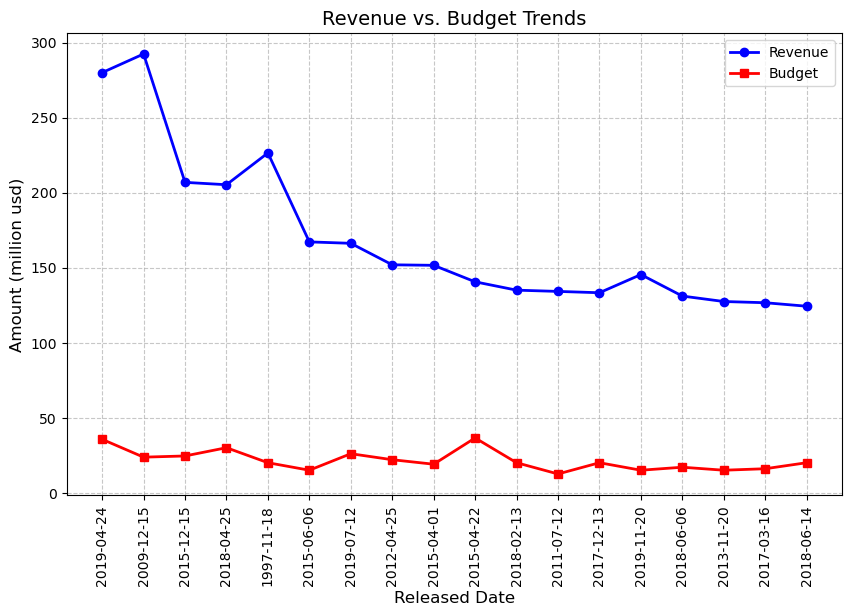

In [ ]:
# Creating Revenue vs. Budget Trends Plot.
plt.figure(figsize=(10, 6))

# Plot Revenue and Budget lines
plt.plot(df['release_date'],df['revenue (million usd)'], 'o-', color='blue', linewidth=2, label='Revenue')
plt.plot(df['release_date'],df['budget (million usd)'], 's-', color='red', linewidth=2, label='Budget')

# Add labels and title
plt.title('Revenue vs. Budget Trends', fontsize=14)
plt.xlabel('Released Date', fontsize=12)
plt.ylabel('Amount (million usd)', fontsize=12)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Set x-axis ticks to a 90 degree rotation
plt.xticks(df['release_date'], rotation=90);

<Axes: xlabel='genres', ylabel='roi'>

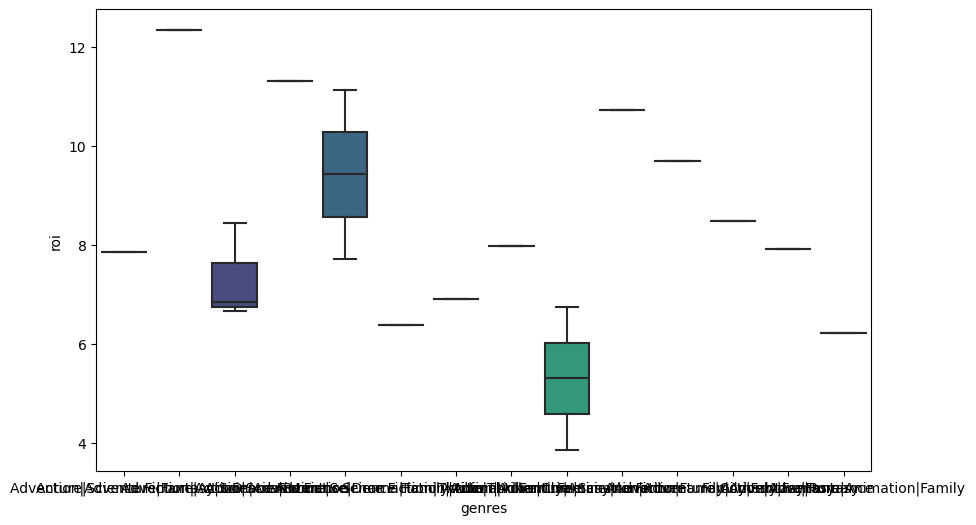

In [187]:
# ROI Distribution by Genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='genres', y='roi', data=df, palette='viridis')

## Key Findings
### Best & Worst Performing Movies
1. Highest bugdeted movie is Avengers: Age of Ultron
2. Movie with the highest revenue is Avatar
3. Movie with the highest profit and ROI is Avatar
4. Movie with lowest profit and ROI is Avengers: Age of Ultron
5. The most popular movie is Avengers
6. Movie with the highest ratings is Avengers: Endgame


### Franchise vs. Standalone Movie Performance
1. Standalone movies have the highest average revenue, the highest median ROI and the high average popularity
2. Franchise movies have the highest average budget

### Most sucessful Franchise And Directors
1. The Franchise with the most number of movies is the Avengers Collection
2. The Franchise with the highest average and total budget is the Avengers Collection
3. The Franchise with the highest total and average revenue is the Avengers and the Avatar collection respectiveky
4. The Franchise with the highest average ratings is the Harry Potter collections
5. Diretors with highest number of movies are James Cameron, Joss Whedon, Anthony Russo, Joe Russo, Chris Buck, Jennifer Lee
